In [2]:
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [3]:
df = pd.read_csv('data/weatherAUS.csv')
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df.dropna(subset=['RainTomorrow'], inplace=True)
df.drop(columns=['Evaporation', 'Date', 'Sunshine'], inplace=True, axis=1)
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features:
    q99 = df[feature].quantile(0.99)
    df = df.loc[(df[feature].isna()) | (df[feature] < q99)]

In [4]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train_KNNI = pd.read_csv("data/X_train_KNNI.csv", index_col=0)
X_test_KNNI = pd.read_csv("data/X_test_KNNI.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)

In [7]:
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']
scale_feats = X_train_KNNI[scale_cols]
scaler = StandardScaler().fit_transform(scale_feats.values)
X_train_KNNI[scale_cols] = scaler
X_train_scaled = X_train_KNNI.copy()

In [118]:
def model_metrics(model, X_train, y_train, name):
    plot_confusion_matrix(model, X_train, y_train, cmap='rocket');
    plot_roc_curve(model, X_train, y_train);
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    cv = cross_val_score(model, X_train, y_train)
    return print(f"""
    {name} Model Metrics:
    Accuracy Score: {accuracy}
    Recall Score: {recall}
    Precision Score: {precision}
    F1 Score: {f1}
    Cross Validation Scores: {cv}
    """)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



    Baseline Model Metrics:
    Accuracy Score: 0.6670119052810606
    Recall Score: 0.20558902971119883
    Precision Score: 0.2060707033893893
    F1 Score: 0.2058295847525937
    Cross Validation Scores: [0.66312347 0.67151812 0.67151812 0.66748433 0.67095508]
    


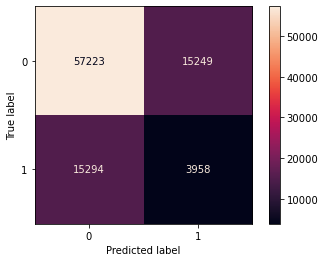

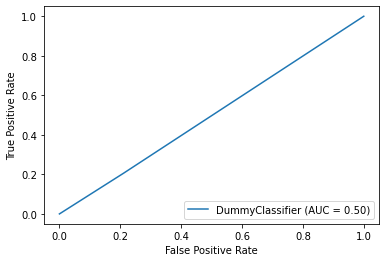

In [123]:
model_metrics(baseline, X_train_KNNI, y_train, 'Baseline')

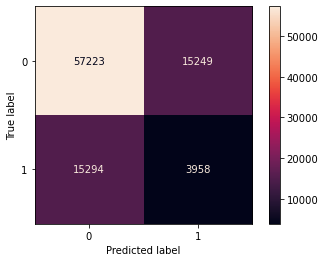

In [120]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

plot_confusion_matrix(baseline, X_train_KNNI, y_train, cmap='rocket');

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



Accuracy
Baseline: 0.667 
Recall
Baseline: 0.206 
Precision
Baseline: 0.206 
F1 Score
Baseline: 0.206
Cross Val Scores
Baseline:[0.663 0.672 0.672 0.667 0.671]



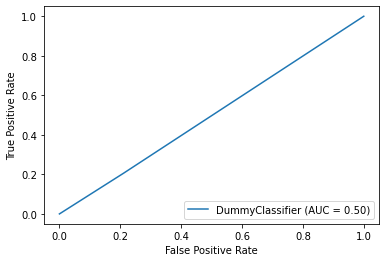

In [11]:
plot_roc_curve(baseline, X_train_KNNI, y_train);
baseline_accuracy = accuracy_score(y_train, baseline.predict(X_train_KNNI))
baseline_recall = recall_score(y_train, baseline.predict(X_train_KNNI))
baseline_precision = precision_score(y_train, baseline.predict(X_train_KNNI))
baseline_f1 = f1_score(y_train, baseline.predict(X_train_KNNI))
baselinecrossval = cross_val_score(baseline, X_train_KNNI, y_train)
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} 
Recall
Baseline: {baseline_recall:1.3f} 
Precision
Baseline: {baseline_precision:1.3f} 
F1 Score
Baseline: {baseline_f1:1.3f}
Cross Val Scores
Baseline:{baselinecrossval.round(3)}
""")

'baseline'